In [1]:
# Import libs

from pycaret.datasets import get_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mlflow

In [2]:
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [3]:
# Grab data

df = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n\n-----------------------------------------------------------\n\n")

Carat Weight
1.01    448
0.90    373
1.00    285
2.01    248
1.02    190
       ... 
1.90      1
2.67      1
2.56      1
2.68      1
1.89      1
Name: count, Length: 196, dtype: int64


-----------------------------------------------------------


Cut
Ideal              2482
Very Good          2428
Good                708
Signature-Ideal     253
Fair                129
Name: count, dtype: int64


-----------------------------------------------------------


Color
G    1501
H    1079
F    1013
I     968
E     778
D     661
Name: count, dtype: int64


-----------------------------------------------------------


Clarity
SI1     2059
VS2     1575
VS1     1192
VVS2     666
VVS1     285
IF       219
FL         4
Name: count, dtype: int64


-----------------------------------------------------------


Polish
EX    2425
VG    2409
ID     595
G      571
Name: count, dtype: int64


-----------------------------------------------------------


Symmetry
VG    2417
EX    2059
G      916
ID     608

In [6]:
# Apply encoding for non-numberic features

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for i in df.columns:
    if i != 'Carat Weight' and i != 'Price':
        df[i] = encoder.fit_transform(df[i])

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n\n-----------------------------------------------------------\n\n")

Carat Weight
1.01    448
0.90    373
1.00    285
2.01    248
1.02    190
       ... 
1.90      1
2.67      1
2.56      1
2.68      1
1.89      1
Name: count, Length: 196, dtype: int64


-----------------------------------------------------------


Cut
2    2482
4    2428
1     708
3     253
0     129
Name: count, dtype: int64


-----------------------------------------------------------


Color
3    1501
4    1079
2    1013
5     968
1     778
0     661
Name: count, dtype: int64


-----------------------------------------------------------


Clarity
2    2059
4    1575
3    1192
6     666
5     285
1     219
0       4
Name: count, dtype: int64


-----------------------------------------------------------


Polish
0    2425
3    2409
2     595
1     571
Name: count, dtype: int64


-----------------------------------------------------------


Symmetry
3    2417
0    2059
1     916
2     608
Name: count, dtype: int64


-----------------------------------------------------------


Report
1

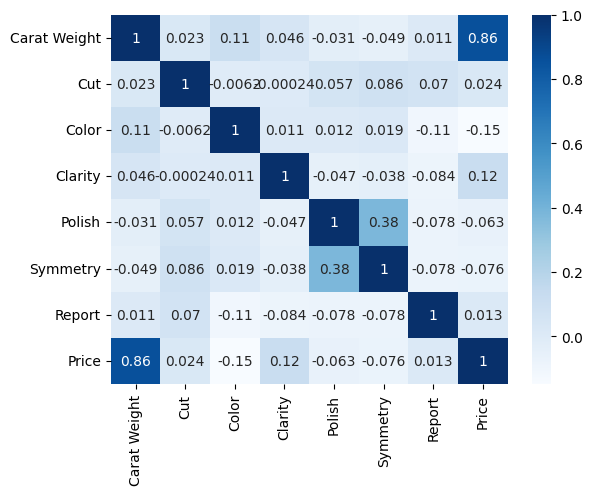

In [8]:
# Show Pirsion's & Kendall's correlation matrixes

sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.show()

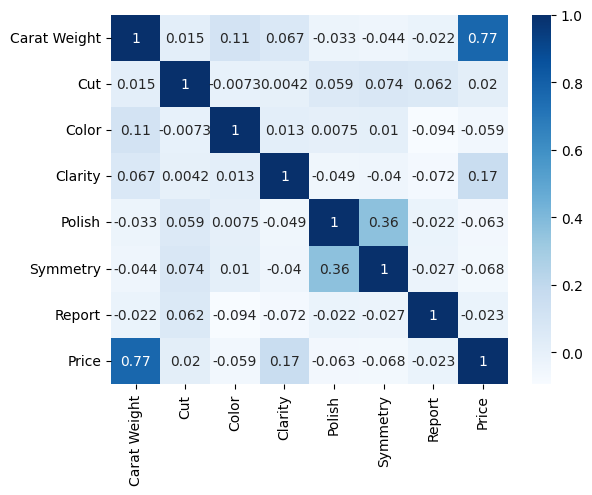

In [9]:
sns.heatmap(df.corr(method = 'kendall'), cmap = 'Blues', annot = True)
plt.show()

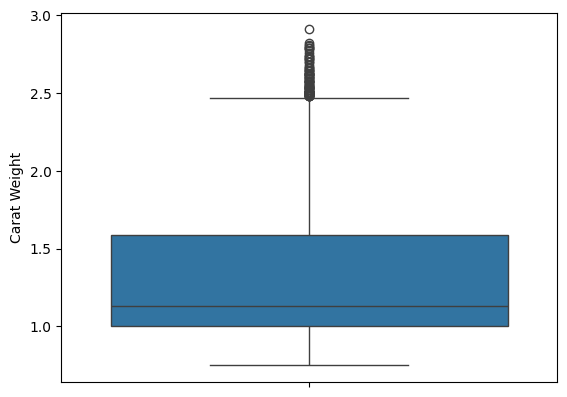

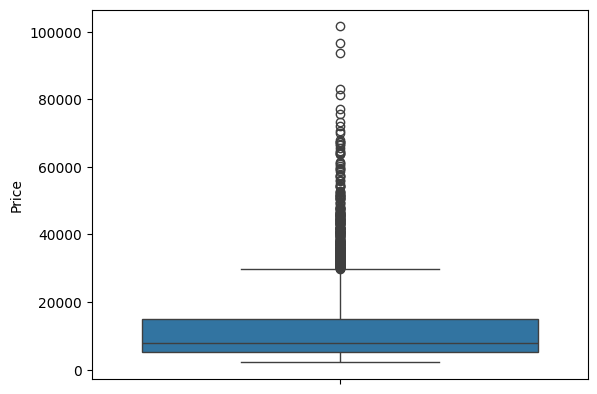

In [10]:
# And box plots for numerics features

sns.boxplot(df['Carat Weight'])
plt.show()

sns.boxplot(df['Price'])
plt.show()

In [11]:
# Enable mlflow to log experements

mlflow.autolog()

2024/03/03 11:45:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/03/03 11:45:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [12]:
from pycaret.regression import *

s = setup(df, target = 'Price', session_id = 1212,
           log_experiment = True, experiment_name = 'diamond_0')

,Description,Value
0,Session id,1212
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 8)"
5,Transformed train set shape,"(4200, 8)"
6,Transformed test set shape,"(1800, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [13]:
model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:45:37
Status,. . . . . . . . . . . . . . . . . .,Initializing CV
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,669.7554,1913952.8058,1353.9592,0.9813,0.0704,0.0524,9.7840
gbr,Gradient Boosting Regressor,800.5787,2128386.8216,1448.1207,0.9786,0.0896,0.0681,0.1970
rf,Random Forest Regressor,749.4190,2177925.8869,1458.0995,0.9782,0.0811,0.0604,0.4550
et,Extra Trees Regressor,747.2519,2302144.8104,1497.0890,0.9771,0.0804,0.0603,0.4450
dt,Decision Tree Regressor,930.7172,3329561.9430,1808.7800,0.9664,0.1040,0.0754,0.0280
ridge,Ridge Regression,2617.3989,17860469.1445,4150.4897,0.8251,0.5429,0.2882,0.0270
lar,Least Angle Regression,2619.5840,17860408.8799,4150.7242,0.8250,0.5413,0.2887,0.0270
llar,Lasso Least Angle Regression,2618.9605,17860439.0172,4150.6508,0.8250,0.5389,0.2885,0.0280
br,Bayesian Ridge,2618.8041,17860284.5675,4150.6247,0.8250,0.5413,0.2885,0.0240
lasso,Lasso Regression,2618.9612,17860438.6379,4150.6510,0.8250,0.5389,0.2885,0.0370


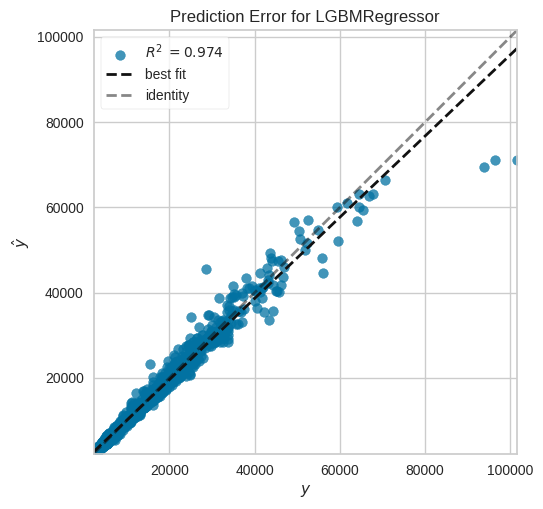

In [14]:
# Get pretty good model. 
# Do not try to obtain better resulat cause R2 0.9813 one step from overfitting.

plot_model(model, plot = 'error')

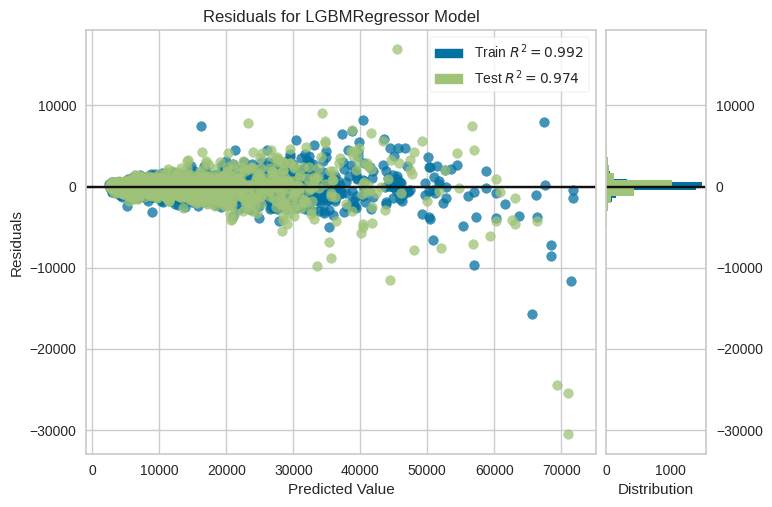

In [15]:
plot_model(model, plot = 'residuals')

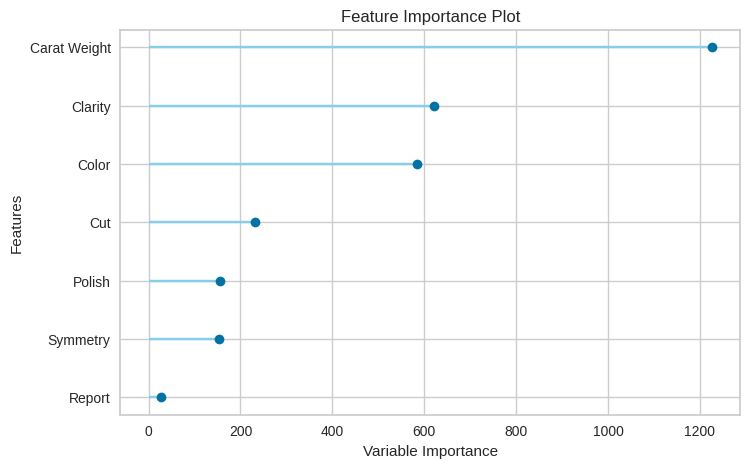

In [16]:
plot_model(model, plot = 'feature')

And show mlflow screenshot

![](Regression_AutoML.png)